- 주피터 노트북과 유사한 환경을 제공

# 환경설정

-  colab : 코드 작성,라이브터리 연동,GPU활용
-  구글 드라이브 : 데이터 가져오거나 저장


- 코랩에서 구글 드라이브에 있는 파일 접근
  - 왼쪽은 아이콘 클릭
    - 상단의 아이콘 클릭

(-0.5, 221.5, 299.5, -0.5)

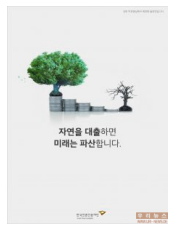

In [ ]:
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/lecture_image/nature.png")
plt.imshow(img)
plt.axis("off")

In [ ]:
import pandas as pd

bmi = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/bmi_500.csv")

bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


# GPU 체크하기

In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()





[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 845650502090496718
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14444920832
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 608931148017866520
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [2]:
# 현재 할당된 것이 CPU인지 GPU인지 확인
import tensorflow as tf

tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# 현재 할당된 GPU를 실행
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
gpus = tf.config.experimental.list_physical_devices("GPU")

if gpus :
  try :
    # 메모리를 GPU 메모리를 사용
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as re :
    print(re)

In [4]:
# GPU 메모리를 전부 할당하지 않고 필요에 따라 자동으로 할당하도록 설정
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)


In [6]:
!pip freeze

absl-py==1.2.0
aeppl==0.0.33
aesara==2.7.9
aiohttp==3.8.1
aiosignal==1.2.0
alabaster==0.7.12
albumentations==1.2.1
altair==4.2.0
appdirs==1.4.4
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
async-timeout==4.0.2
asynctest==0.13.0
atari-py==0.2.9
atomicwrites==1.4.1
attrs==22.1.0
audioread==3.0.0
autograd==1.4
Babel==2.10.3
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.1
blis==0.7.8
bokeh==2.3.3
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==2.0.8
certifi==2022.6.15
cffi==1.15.1
cftime==1.6.1
chardet==3.0.4
charset-normalizer==2.1.1
click==7.1.2
clikit==0.6.2
cloudpickle==1.5.0
cmake==3.22.6
cmdstanpy==1.0.7
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
cons==0.4.5
contextlib2==0.5.5
convertdate==2.4.0
crashtest==0.3.1
crcmod==1.7
cufflinks==0.17.3
cupy-cuda111==9.4.0
cvxopt==1.3.0
cvxpy==1.2.1
cycler==0.11.0
cymem==2.0.6
Cython==0.29.32
daft==0.0.4
dask==2022.2.0
datascience==0.17.5
debugpy==1.0.0
decorator==4.

# Keras 프레임워크

- Sequential() : 신경망(퍼셉트론으로 구성되어 있는 것, 뉴런으로 구성되어 있는 것)을 생성
- Dense() : 신경망에 퍼셉트론 층을 설정
  - units : 현재의 층의 퍼셉트론의 수 (출력의 수)
  - input_dim : 입력의 수(입력되는 데이터의 특성의 수)
- Activation() : 활성화 함수를 설정
- add() : Dense()나 Activation() 등을 신경망에 추가

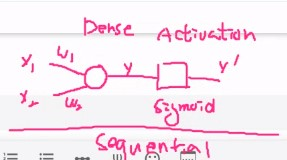
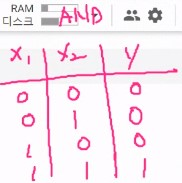

- units : 1 (출력의 값 : 1 (1개))
- input_dim : 2 (입력 값 : x1, x2 (2개))

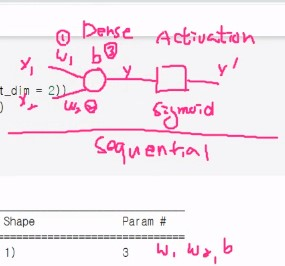

- 특성 수 : 3 (w1, w2, b)

# AND 논리 학습하기

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model1 = Sequential()

model1.add(Dense(units = 1, input_dim = 2))
model1.add(Activation("sigmoid"))

# 생성된 신경망의 구조를 출력
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 데이터 정의

In [21]:
import pandas as pd
import numpy as np

X_AND = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_AND = [0, 0, 0, 1]

# 파라미터 (w, b)들의 초기값의 시드를 설정

- 일반적으로 신경망을 생성하면 파라미터(가중치: w, b) 값을 랜덤으로 초기화
- 항상 동일한 초기값을 설정되도록 시드를 설정

In [9]:
import tensorflow as tf

seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [18]:
# 작성한 신경망을 학습할 수 있도록 컴파일
# - loss : 사용할 손실 함수 (비용 함수)
#   - 회귀 : mse(mean_squared_error)
#   - 이진분류 : binary_corssentropy
#   - 다진 분류 : categorical_crossentropy
# - optimizer : 최적화 함수 (경사하강법의 종류)
#   - adam
# - metrics : 평가도구 (정확도 또는 오차)
#   - 회귀 : 표기하지 않음
#   - 분류 : accuracy(acc라고 써도 되는데 오류 뜨는 경우가 있어서 accuracy라고 씀)

model1.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [25]:
# 학습
# batch_size : 한 번 반복할 때, 몇 개 데이터를 사용할 것인지 설정
# epochs : 몇 번 반복할 것인지 설정 (w, b를 몇 번 업데이트 할 것인지 설정)
h1 = model1.fit(X_AND, y_AND, batch_size = 4, epochs = 8000) # 여러번 돌릴수록 loss가 낮아짐

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
1/1 [==============================] - 0s 10ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 5502/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 5503/8000
1/1 [==============================] - 0s 11ms/step - loss: 0.0815 - accuracy: 1.0000
Epoch 5504/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5505/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5506/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5507/8000
1/1 [==============================] - 0s 10ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5508/8000
1/1 [==============================] - 0s 9ms/step - loss: 0.0814 - accuracy: 1.0000
Epoch 5509/8000
1/1 [==============================] - 0s 13ms/step - loss: 0.0813 - accuracy: 1.0000
Epoch 5510/8000
1/1 [==============================] - 0s 11ms/st

# 예측

In [26]:
X_new = [[1, 0], [1, 1], [0, 0], [0, 1]]
y_new = [0, 1, 0, 0]

pred = model1.predict(X_new)
pred

array([[5.8462348e-02],
       [9.4065017e-01],
       [2.2716529e-04],
       [5.4818332e-02]], dtype=float32)

# XOR논리 학습하기

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model1 = Sequential()

model1.add(Dense(units = 1, input_dim = 2))
model1.add(Activation(""))

# 생성된 신경망의 구조를 출력
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
 activation_3 (Activation)   (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# 데이터 정의

In [35]:
import pandas as pd
import numpy as np

X_AND = [[0, 0], [0, 1], [1, 0], [1, 1]]
y_AND = [0, 1, 1, 0]

# 파라미터 (w, b)들의 초기값의 시드를 설정

- 일반적으로 신경망을 생성하면 파라미터(가중치: w, b) 값을 랜덤으로 초기화
- 항상 동일한 초기값을 설정되도록 시드를 설정

In [36]:
import tensorflow as tf

seed = 0

np.random.seed(seed)
tf.random.set_seed(seed)

In [37]:
# 작성한 신경망을 학습할 수 있도록 컴파일
# - loss : 사용할 손실 함수 (비용 함수)
#   - 회귀 : mse(mean_squared_error)
#   - 이진분류 : binary_corssentropy
#   - 다진 분류 : categorical_crossentropy
# - optimizer : 최적화 함수 (경사하강법의 종류)
#   - adam
# - metrics : 평가도구 (정확도 또는 오차)
#   - 회귀 : 표기하지 않음
#   - 분류 : accuracy(acc라고 써도 되는데 오류 뜨는 경우가 있어서 accuracy라고 씀)

model1.compile(loss="binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])


In [38]:
# 학습
# batch_size : 한 번 반복할 때, 몇 개 데이터를 사용할 것인지 설정
# epochs : 몇 번 반복할 것인지 설정 (w, b를 몇 번 업데이트 할 것인지 설정)
h1 = model1.fit(X_AND, y_AND, batch_size = 4, epochs = 8000) # 여러번 돌릴수록 loss가 낮아짐

Epoch 1/8000
1/1 [==============================] - 1s 779ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/8000
1/1 [==============================] - 0s 9ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/8000
1/1 [==============================] - 0s 9ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/8000
1/1 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/8000
1/1 [==============================] - 0s 8ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/8000
1/1 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/8000
1/1 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/8000
1/1 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/8000
1/1 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/8000
1/1 [==============================] - 0s 7ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/8000
1

KeyboardInterrupt: ignored

# 예측

In [ ]:
X_new = [[1, 0], [1, 1], [0, 0], [0, 1]]
y_new = [1, 0, 0, 1]

pred = model1.predict(X_new)
pred